# Tutorial on GraphNN

We try to build a GraphNN that recognize if an image contains a rectangle or a circle, representing the image as a point cloud

## Import useful stuff

In [1]:
import numpy as np
from math import *
from matplotlib import pyplot as plt 
#device_name = tf.test.gpu_device_name()
#print(device_name)

# Load the dataset

In [15]:
# load one file
import h5py
f = h5py.File("data/ShapeClassifier_Circle0.9_Noise0.3.h5", "r")
#f = h5py.File("data/ShapeClassifier_Circle0.9_Rectangle0.7.h5", "r")
X_train = np.array(f.get("X_train"))
X_test = np.array(f.get("X_test"))
Y_train = np.array(f.get("Y_train"))
Y_test = np.array(f.get("Y_test"))
A_train = np.array(f.get("A_train"))
A_test = np.array(f.get("A_test"))
f.close()    

In [16]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(A_train.shape, A_test.shape)

(700, 100, 3) (300, 100, 3)
(700,) (300,)
(700, 100, 100) (300, 100, 100)


In [17]:
#replace with mine
#!git submodule add https://github.com/vermaMachineLearning/keras-deep-graph-learning.git

In [18]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'keras-deep-graph-learning'))

# Now we define the Classifier
We use an implementation of Graph Convolutional Layers, distributed with
https://vermamachinelearning.github.io/keras-deep-graph-learning/

In [19]:
import tensorflow.keras.backend as K
from keras_dgl.layers import MultiGraphCNN
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Reshape
from tensorflow.keras.models import Model, Sequential
    
NUM_FILTERS = 1
graph_conv_filters = A_train 
graph_conv_filters = K.constant(graph_conv_filters)
    
X_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
graph_conv_filters_input = Input(shape=(graph_conv_filters.shape[1], graph_conv_filters.shape[2]))
    
hidden =  MultiGraphCNN(2, NUM_FILTERS, activation='relu', kernel_initializer='random_normal')([X_input,graph_conv_filters_input])
hidden = Dropout(0.4)(hidden)
hidden =  MultiGraphCNN(1, NUM_FILTERS, activation='relu', kernel_initializer='random_normal')([hidden,graph_conv_filters_input])
hidden = Dropout(0.4)(hidden)
hidden = Flatten()(hidden)
output = Dense(1, activation='sigmoid', kernel_initializer='random_normal')(hidden)
loss="binary_crossentropy"
model = Model(inputs=[X_input,graph_conv_filters_input], outputs=output)
model.compile(loss=loss, optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 3)]     0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100, 100)]   0                                            
__________________________________________________________________________________________________
multi_graph_cnn_2 (MultiGraphCN (None, 100, 2)       8           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 100, 2)       0           multi_graph_cnn_2[0][0]    

In [20]:
history = model.fit([X_train, graph_conv_filters],Y_train,validation_split=0.3, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 15ms/step - loss: 0.6909 - accuracy: 0.5497 - val_loss: 0.6923 - val_accuracy: 0.5071
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4921 - val_loss: 0.6918 - val_accuracy: 0.5071
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5084 - val_loss: 0.6907 - val_accuracy: 0.5071
Epoch 4/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6861 - accuracy: 0.5383 - val_loss: 0.6889 - val_accuracy: 0.5071
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.4895 - val_loss: 0.6868 - val_accuracy: 0.5071
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.4999 - val_loss: 0.6816 - val_accuracy: 0.5071
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.4985 - val_loss: 0.6778 - val_accuracy: 0.5166
Epoch 8/200

Epoch 59/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.9107 - val_loss: 0.3871 - val_accuracy: 0.9573
Epoch 60/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8632 - val_loss: 0.3857 - val_accuracy: 0.9573
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3774 - accuracy: 0.8958 - val_loss: 0.3806 - val_accuracy: 0.9573
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8948 - val_loss: 0.3738 - val_accuracy: 0.9621
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.9077 - val_loss: 0.3660 - val_accuracy: 0.9573
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8717 - val_loss: 0.3656 - val_accuracy: 0.9573
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9143 - val_loss: 0.3620 - val_accuracy: 0.9573
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.9147 - val_loss: 0.2382 - val_accuracy: 0.9573
Epoch 117/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2843 - accuracy: 0.9287 - val_loss: 0.2370 - val_accuracy: 0.9668
Epoch 118/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2530 - accuracy: 0.9276 - val_loss: 0.2356 - val_accuracy: 0.9573
Epoch 119/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.9241 - val_loss: 0.2361 - val_accuracy: 0.9668
Epoch 120/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9374 - val_loss: 0.2335 - val_accuracy: 0.9668
Epoch 121/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.9341 - val_loss: 0.2318 - val_accuracy: 0.9668
Epoch 122/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9420 - val_loss: 0.2305 - val_accuracy: 0.9668
Epoch 123/200

16/16 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.9125 - val_loss: 0.1864 - val_accuracy: 0.9668
Epoch 174/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9296 - val_loss: 0.1865 - val_accuracy: 0.9668
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9088 - val_loss: 0.1856 - val_accuracy: 0.9668
Epoch 176/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9306 - val_loss: 0.1854 - val_accuracy: 0.9668
Epoch 177/200
16/16 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.9397 - val_loss: 0.1849 - val_accuracy: 0.9668
Epoch 178/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9326 - val_loss: 0.1865 - val_accuracy: 0.9668
Epoch 179/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2118 - accuracy: 0.9376 - val_loss: 0.1845 - val_accuracy: 0.9668
Epoch 180/200

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


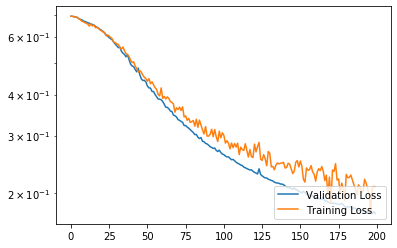

In [21]:
print(history.history.keys())
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.yscale('log')
plt.legend(loc='lower right')
plt.show()

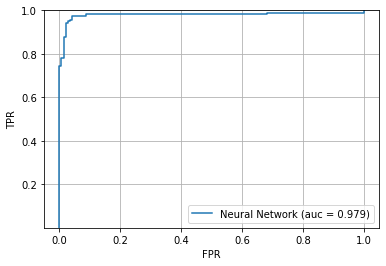

In [22]:
from sklearn.metrics import roc_curve, auc

graph_conv_filters = A_test 
graph_conv_filters = K.constant(graph_conv_filters)
Y_pred = model.predict([X_test, graph_conv_filters])

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()